# Module 3: Machine Learning

## Sprint 2: Intermediate Machine Learning

## House prices regression competition, part 2

## Background

---

Participating in Kaggle competitions is an efficient way to learn some aspects of Machine Learning. You can read solutions made public by the others, participate in the discussions to talk about solution ideas and test them by submitting them for evaluation.

The metric used for evaluation can vary from competition to competition, but the idea remains the same - build a model that is as accurate as possible on the testing set. In industry, there are other factors to consider when building machine learning models - inference time, solution complexity, maintainability and so on. However, even though you only learn a subset of the required skills while participating in Kaggle competitions, it is quite a fun way to learn by doing it, so let's participate in one of the tutorial competitions again!

## The competition

In this notebook we will again participate in the Kaggle competition below:

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

For help, you can look at some of the notebooks by other competitors. However, try to write code by yourself, as even though you will always be able to consult external resources while working as a professional, the main thing right now is to learn by first trying it yourself.

---

## Concepts to explore

- Neural network regressor in scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
- Gradient boosting regressor in scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- xgboost for regression https://www.geeksforgeeks.org/xgboost-for-regression/

## Requirements

- Build and submit a scikit-learn pipeline having neural network regressor as the model
- Build and submit a scikit-learn pipeline having gradient boosted regressor as the model
- Build and submit a xgboost model
- Achieve a score better than 0.13 on the public leaderboard

## Evaluation criteria

- Public leaderboard score
- How simple is the model
- How fast is the model prediction
- Code quality


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- How can model regularization help and what are some of the ways to use regularization?
- What are the benefits and the risks of hyper-parameter optimization?
- Why is it useful to crossvalidate your model using many splits? Why sometimes a single validation split is still used?
- Why is it useful to build a pipeline that encapsulates all the preprocessing, model training and other steps?

# Data set

## Information given by authors
*   23 nominal, 23 ordinal, 14 discrete, and 20 continuous
*   I will say that the 80 variables focus on thequality and quantity of many physical attributes of the property
*   In general the 20 continuous variables relate to various area dimensions for each observation.
*   Area measurements on the basement, main living area, and even porches are broken down into individual categories based on quality and type
*   The 14 discrete variables typically quantify the number of items occurring within the house.
*   The nominal variables typically identify various types of dwellings, garages, materials, and environmental conditions while the ordinal variables typically rate various items within the property.
*    all sales that had occurred within Ames from 2006 to 2010

## Notes

1. Check how important is are **Condition1** and **Condition2**. Each column has 9 nominal values. Second column might have nulls because it defines a second condition if it applies. It would not make sense to encode condition2 with most frequent values if it has any NaN. But also if the features are not usefull it would be nice to drop them, since they would introduce 16+2 columns when encoded.
2. **OverallQual** and **OverallCond** columns are ordinal and already encoded with int values. Highest values mean better quality and condition and lower values mean poorer quality and condition. I could try leaving them the way they are and therefore introducing some bias. It could make the model perform better. 
3. **Exterior1** and **Exterior2** same logic as #1 applies.
4. **MiscVal**: $Value of miscellaneous feature. This columns is related with MiscFeature. So if I drop one I should drop another.
5. **MoSold** is encoded in integer values, however it should not be.
6. Make all continuous variables float.
7. Discrete into int.
8. Discrete into strings.
9. Remove houses with general living area above 4000 k sq.feet
10. Get rid of ID column it's useless.

# Data Import

In [1]:
import missingno as msno
import numpy as np
import pandas as pd
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [195]:
!ls

sample_data  test.csv  train.csv


In [398]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [399]:
df = train.copy()
df.shape

(1460, 81)

# Missing Data

## Continues Variables

In [400]:
df_continuos = df[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2', 'EnclosedPorch', 'GarageArea','GrLivArea', 'LotArea',
                   'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF']]
df_continuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   int64  
 2   3SsnPorch      1460 non-null   int64  
 3   BsmtUnfSF      1460 non-null   int64  
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   EnclosedPorch  1460 non-null   int64  
 7   GarageArea     1460 non-null   int64  
 8   GrLivArea      1460 non-null   int64  
 9   LotArea        1460 non-null   int64  
 10  LotFrontage    1201 non-null   float64
 11  LowQualFinSF   1460 non-null   int64  
 12  MasVnrArea     1452 non-null   float64
 13  MiscVal        1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  PoolArea       1460 non-null   int64  
 16  ScreenPorch    1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   int64  
 18  WoodDeck

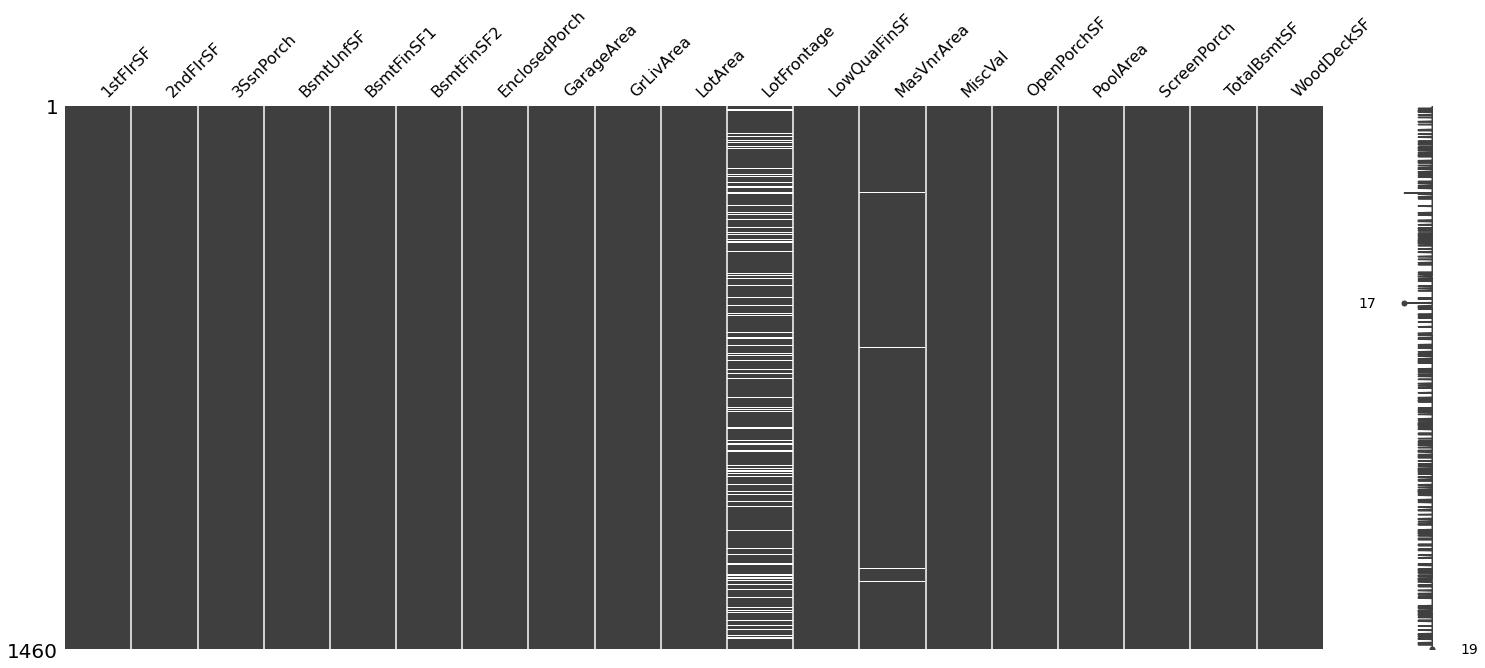

In [401]:
msno.matrix(df_continuos)

## Discrete Variables

In [402]:
df_discrete = df[['BedroomAbvGr','BsmtFullBath','BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'GarageYrBlt',
                  'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'YrSold']]
df_discrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BedroomAbvGr  1460 non-null   int64  
 1   BsmtFullBath  1460 non-null   int64  
 2   BsmtHalfBath  1460 non-null   int64  
 3   Fireplaces    1460 non-null   int64  
 4   FullBath      1460 non-null   int64  
 5   GarageCars    1460 non-null   int64  
 6   GarageYrBlt   1379 non-null   float64
 7   HalfBath      1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   TotRmsAbvGrd  1460 non-null   int64  
 10  YearBuilt     1460 non-null   int64  
 11  YearRemodAdd  1460 non-null   int64  
 12  YrSold        1460 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 148.4 KB


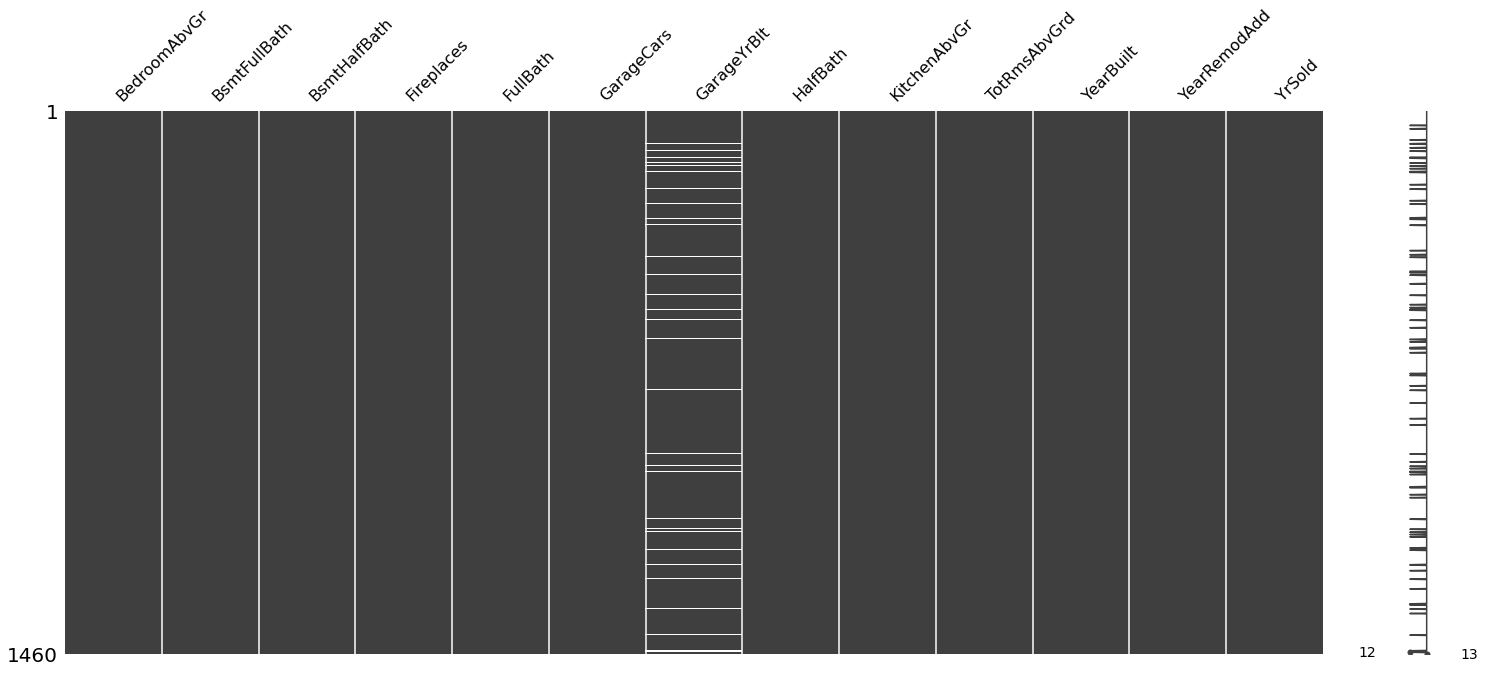

In [403]:
msno.matrix(df_discrete)

## Nominal Variables

In [404]:
df_nominal = df[['Alley','BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Exterior1st','Exterior2nd', 'MoSold','Foundation','GarageType','Heating',
                 'HouseStyle', 'LandContour', 'LotConfig', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street']]
df_nominal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Alley          91 non-null     object
 1   BldgType       1460 non-null   object
 2   CentralAir     1460 non-null   object
 3   Condition1     1460 non-null   object
 4   Condition2     1460 non-null   object
 5   Exterior1st    1460 non-null   object
 6   Exterior2nd    1460 non-null   object
 7   MoSold         1460 non-null   int64 
 8   Foundation     1460 non-null   object
 9   GarageType     1379 non-null   object
 10  Heating        1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  LandContour    1460 non-null   object
 13  LotConfig      1460 non-null   object
 14  MSSubClass     1460 non-null   int64 
 15  MSZoning       1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  MiscFeature    54 non-null     object
 18  Neighborhood   1460 non-null

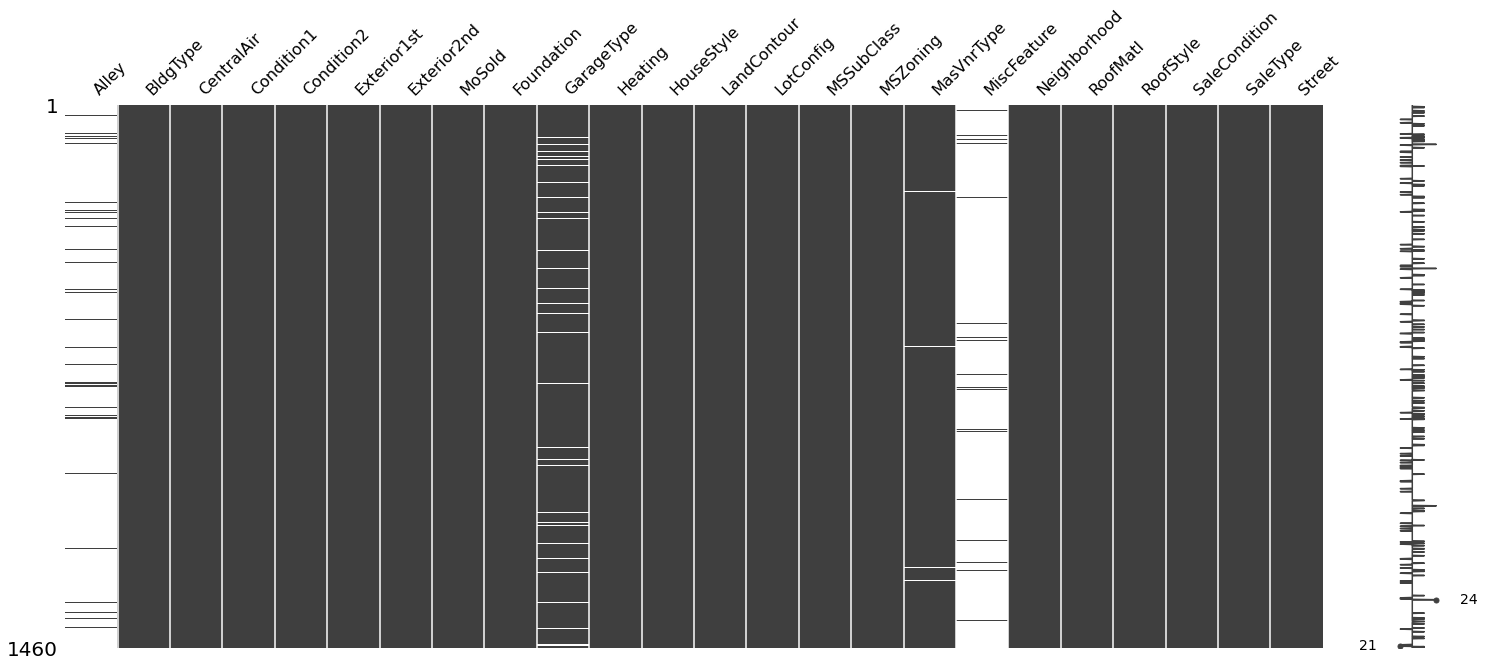

In [405]:
msno.matrix(df_nominal)

## Ordinal Variables

In [406]:
df_ordinal = df[['BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'ExterCond', 
                 'ExterQual', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual',
                 'LandSlope', 'LotShape', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolQC', 'Utilities']]
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtCond      1423 non-null   object
 1   BsmtExposure  1422 non-null   object
 2   BsmtQual      1423 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinType2  1422 non-null   object
 5   Electrical    1459 non-null   object
 6   ExterCond     1460 non-null   object
 7   ExterQual     1460 non-null   object
 8   Fence         281 non-null    object
 9   FireplaceQu   770 non-null    object
 10  Functional    1460 non-null   object
 11  GarageCond    1379 non-null   object
 12  GarageFinish  1379 non-null   object
 13  GarageQual    1379 non-null   object
 14  HeatingQC     1460 non-null   object
 15  KitchenQual   1460 non-null   object
 16  LandSlope     1460 non-null   object
 17  LotShape      1460 non-null   object
 18  OverallCond   1460 non-null   int64 
 19  Overal

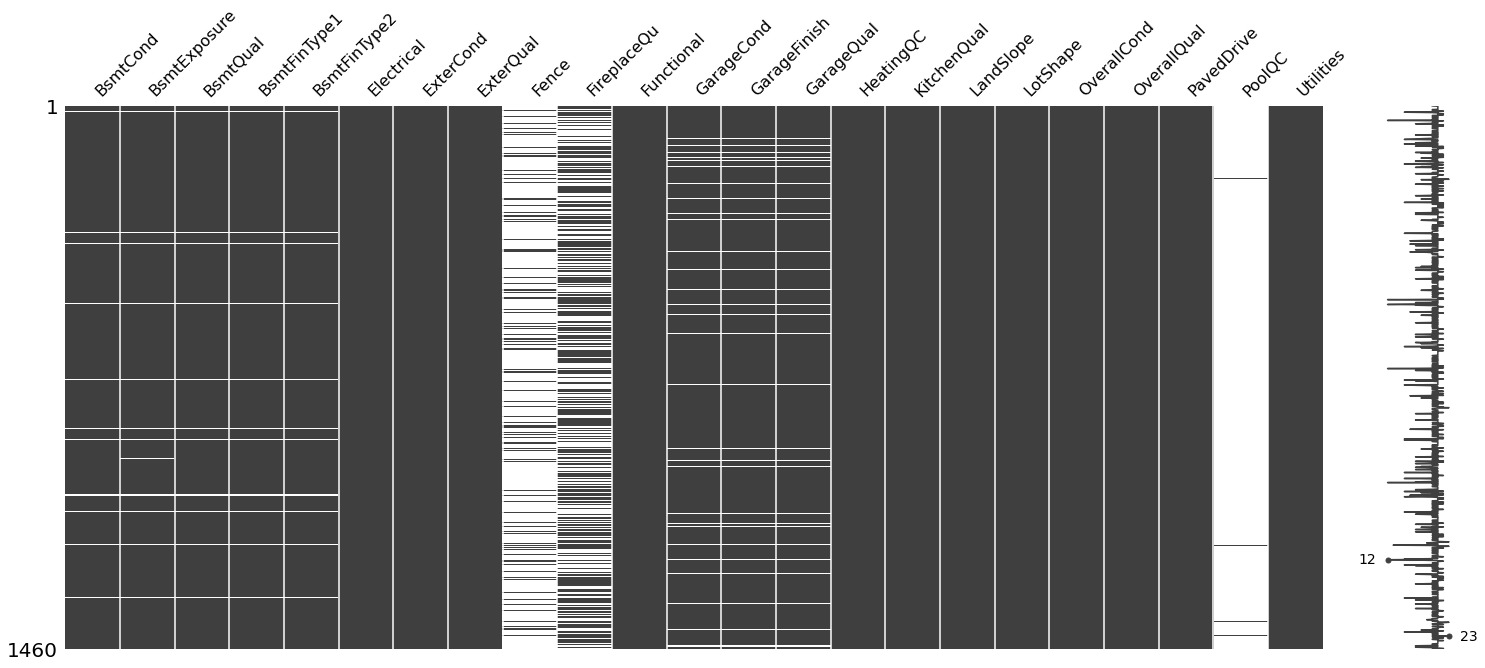

In [407]:
msno.matrix(df_ordinal)

# Removing outliers

In [408]:
import plotly.express as px
fig = px.scatter(x=df.GrLivArea, y=df.SalePrice)
fig.show()

In [409]:
# Filtering out houses above 4000 

index_names = df[df['GrLivArea'] >= 4000 ].index
df.drop(index_names, inplace = True)

Removing outliers are recommended in the data set description.

In [410]:
# Looking at NaN % within the train

nan = pd.DataFrame(df.isna().sum(), columns = ['NaN_sum'])
nan['Perc(%)'] = (nan['NaN_sum']/1459)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan

,NaN_sum,Perc(%)
Electrical,1,0.068540
MasVnrType,8,0.548321
MasVnrArea,8,0.548321
BsmtQual,37,2.535984
BsmtCond,37,2.535984
BsmtFinType1,37,2.535984
BsmtExposure,38,2.604524
BsmtFinType2,38,2.604524
GarageCond,81,5.551748
GarageQual,81,5.551748


# Dealing with missing values

## Dropping

1. By looking at the values for **MiscFeature** I decided that it wasn't a very informative feature and therefore I'm dropping it. As well as **MiscVal** since its value depends on the former.
2. Data set description says that in **PoolQC** and **Alley** na values mean absesnse of a feaure on a property. So I will drop the columns as well. Even if having those features has significant effect on the price of the house, there are not enough values to train the model with crossvalidation.**PoolArea** is related to **PoolQC** so it will be discarded as well.
3. **LotFrontage** is expressesed by the column **LotArea** so I dropped it.
4. **GarageYrBlt** is expressed by the column **YearBuilt** so I dropped it.
5. I have a hunch that **MasVnrArea** and **MasVnrType** are not usefull for predictions, so I will drop them for a while.
6. I also have dropped the **Id** column because it has no meaning.

In [411]:
columns_to_drop = ['MiscFeature', 'MiscVal', 'PoolQC', 'PoolArea', 'LotFrontage', 'GarageYrBlt', 'Alley', 
                   'Fence', 'FireplaceQu', 'MasVnrType', 'MasVnrArea', 'Id']

In [412]:
# Drop columns in training data
df = df.drop(columns_to_drop, axis=1)

In [413]:
# Looking at NaN % within the train

nan = pd.DataFrame(df.isna().sum(), columns = ['NaN_sum'])
nan['Perc(%)'] = (nan['NaN_sum']/1459)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan

,NaN_sum,Perc(%)
Electrical,1,0.068540
BsmtQual,37,2.535984
BsmtCond,37,2.535984
BsmtFinType1,37,2.535984
BsmtExposure,38,2.604524
BsmtFinType2,38,2.604524
GarageType,81,5.551748
GarageFinish,81,5.551748
GarageQual,81,5.551748
GarageCond,81,5.551748


## Replacing

Here I make a copy of the dropped dataset and then try to see what results I get with simply replacing na with absense of a thing.

In [414]:
df_simple_replacement = df.copy()

In [415]:
df_simple_replacement.GarageFinish = df_simple_replacement.GarageFinish.replace(np.nan, 'No Garage')
df_simple_replacement.GarageQual = df_simple_replacement.GarageQual.replace(np.nan, 'No Garage')
df_simple_replacement.GarageCond = df_simple_replacement.GarageCond.replace(np.nan, 'No Garage')
df_simple_replacement.GarageType = df_simple_replacement.GarageType.replace(np.nan, 'No Garage')
df_simple_replacement.BsmtFinType1 = df_simple_replacement.BsmtFinType1.replace(np.nan, 'No Basement')
df_simple_replacement.BsmtFinType2 = df_simple_replacement.BsmtFinType2.replace(np.nan, 'No Basement')
df_simple_replacement.BsmtQual = df_simple_replacement.BsmtQual.replace(np.nan, 'No Basement')
df_simple_replacement.BsmtExposure = df_simple_replacement.BsmtExposure.replace(np.nan, 'No Basement')
df_simple_replacement.BsmtCond = df_simple_replacement.BsmtCond.replace(np.nan, 'No Basement')

In [416]:
df_simple_replacement.shape

(1456, 69)

In [417]:
df_simple_replacement.dropna(inplace=True, axis=0)

# Preparing Data For testing and training

In [418]:
X_train = df_simple_replacement.drop(columns='SalePrice')
y_train = df_simple_replacement['SalePrice']
X_train.shape

(1455, 68)

In [419]:
test_1 = test.copy()

In [420]:
test_1.shape
for column in test_1.columns.tolist():
  if column not in df_simple_replacement.columns.tolist():
    test_1.drop(columns=column, inplace=True)
test_1.shape

(1459, 68)

In [421]:
# Looking at NaN % within the train

nan = pd.DataFrame(test_1.isna().sum(), columns = ['NaN_sum'])
nan['Perc(%)'] = (nan['NaN_sum']/1459)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan

,NaN_sum,Perc(%)
BsmtUnfSF,1,0.068540
GarageArea,1,0.068540
GarageCars,1,0.068540
KitchenQual,1,0.068540
TotalBsmtSF,1,0.068540
BsmtFinSF2,1,0.068540
BsmtFinSF1,1,0.068540
SaleType,1,0.068540
Exterior2nd,1,0.068540
Exterior1st,1,0.068540


### Dealing with test_1 missing values

In [422]:
test_1.GarageFinish = test_1.GarageFinish.replace(np.nan, 'No Garage')
test_1.GarageQual = test_1.GarageQual.replace(np.nan, 'No Garage')
test_1.GarageCond = test_1.GarageCond.replace(np.nan, 'No Garage')
test_1.GarageType = test_1.GarageType.replace(np.nan, 'No Garage')
test_1.BsmtFinType1 = test_1.BsmtFinType1.replace(np.nan, 'No Basement')
test_1.BsmtFinType2 = test_1.BsmtFinType2.replace(np.nan, 'No Basement')
test_1.BsmtQual = test_1.BsmtQual.replace(np.nan, 'No Basement')
test_1.BsmtExposure = test_1.BsmtExposure.replace(np.nan, 'No Basement')
test_1.BsmtCond = test_1.BsmtCond.replace(np.nan, 'No Basement')

In [423]:
# If house has no basement there will be no square feet in the basement (:
test_1.BsmtFinSF1 = test_1.BsmtFinSF1.replace(np.nan, 0.0)
test_1.BsmtFinSF2 = test_1.BsmtFinSF2.replace(np.nan, 0.0)
test_1.BsmtUnfSF = test_1.BsmtUnfSF.replace(np.nan, 0.0)
test_1.TotalBsmtSF = test_1.TotalBsmtSF.replace(np.nan, 0.0)
test_1.BsmtFullBath = test_1.BsmtFullBath.replace(np.nan, 0)
test_1.BsmtHalfBath = test_1.BsmtHalfBath.replace(np.nan, 0)

In [424]:
from sklearn.impute import SimpleImputer

# Imputng categorical variables
imputer=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
test_1['Exterior1st'] = imputer.fit_transform(test_1['Exterior1st'].values.reshape(-1,1))[:,0]
test_1['Exterior2nd'] = imputer.fit_transform(test_1['Exterior2nd'].values.reshape(-1,1))[:,0]
test_1['KitchenQual'] = imputer.fit_transform(test_1['KitchenQual'].values.reshape(-1,1))[:,0]
test_1['SaleType'] = imputer.fit_transform(test_1['SaleType'].values.reshape(-1,1))[:,0]
test_1['Utilities'] = imputer.fit_transform(test_1['Utilities'].values.reshape(-1,1))[:,0]
test_1['Functional'] = imputer.fit_transform(test_1['Functional'].values.reshape(-1,1))[:,0]
test_1['MSZoning'] = imputer.fit_transform(test_1['MSZoning'].values.reshape(-1,1))[:,0]
test_1['GarageCars'] = imputer.fit_transform(test_1['GarageCars'].values.reshape(-1,1))[:,0]

# Imputing continuous variable
imputer_2=SimpleImputer(missing_values=np.NaN, strategy="median")
test_1.GarageArea = imputer.fit_transform(test_1['GarageArea'].values.reshape(-1,1))[:,0]

In [425]:
discrete_columns = df_discrete.columns.tolist()
continuous_columns = df_continuos.columns.tolist()
nominal_columns = df_nominal.columns.tolist()
ordinal_columns = df_ordinal.columns.tolist()

In [426]:
test_1 = test_1.astype(X_train.dtypes.to_dict())

In [427]:
train_test = pd.concat([test_1, X_train], ignore_index=True)

In [428]:
train_test_encoded = pd.get_dummies(train_test, drop_first=True)
train_test_encoded.shape

(2914, 232)

In [429]:
X_train = train_test_encoded[:1455]
test_encoded = train_test_encoded[1455:]

# Base models for df_simple_replacement

In [430]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr_cross = cross_validate(gbr, X_train, np.log1p(y_train), cv=4, scoring=('neg_root_mean_squared_error'), return_train_score=True)
print("test_score:", np.mean(gbr_cross["test_score"]),"train_score:", np.mean(gbr_cross["train_score"]))

test_score: -0.4094372703787668 train_score: -0.31575490956120394


On test set in kaggle I got 0.44

# Feature Importance

In [431]:
from sklearn.metrics import mean_squared_error
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [432]:
from sklearn.model_selection import train_test_split
# Train-Test split the data

X_train,X_val,y_train,y_val = train_test_split( X_train, np.log1p(y_train), test_size = 0.1,random_state=42)

params = {'n_estimators': 20,
          'max_depth': 3,
          'min_samples_split': 3,
          'learning_rate': 0.1}

gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_val, gbr.predict(X_val)))
rmse

0.3881396391024921

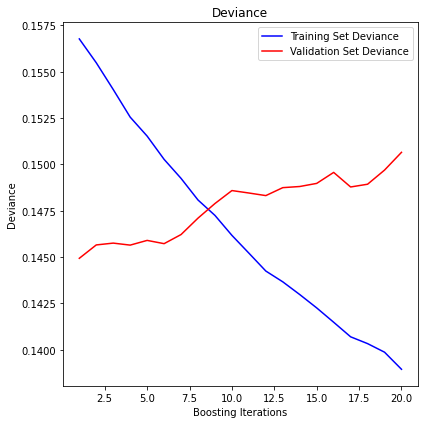

In [473]:
import matplotlib.pyplot as plt
import seaborn as sns

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_val)):
    test_score[i] = gbr.loss_(y_val, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Validation Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [480]:
feature_importance = gbr.feature_importances_
feature_importance = pd.DataFrame({'Feature':X_train.columns.tolist(), 'Importance':feature_importance})
feature_importance.sort_values(by=['Importance'], inplace=True, ascending=True)

In [479]:
import plotly.express as px

fig = px.bar(feature_importance, x="Importance", y="Feature", orientation='h', title='Feature Importance')
fig.update_xaxes(title='Importance')
fig.update_yaxes(title='Feature')
fig.show()